In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

chessboard_size = (8, 6)
square_size = 30

# 3D object points
objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)
objp *= square_size

objpoints = []
imgpoints = []

dataset_path = '../chessboard_dataset'
filenames = sorted([f for f in os.listdir(dataset_path) if f.endswith('.jpeg')])

for file_name in filenames:
    full_path = os.path.join(dataset_path, file_name)
    img = cv2.imread(full_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Chessboard Corners
    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

    if ret:
        objpoints.append(objp)
        corners_refined = cv2.cornerSubPix(
            gray, corners, (11, 11), (-1, -1),
            criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        )
        imgpoints.append(corners_refined)
        cv2.drawChessboardCorners(img, chessboard_size, corners_refined, ret)
        cv2.imshow('Corners', img)
        cv2.waitKey(500)
    else:
        print(f"Corners not found in {file_name}")

cv2.destroyAllWindows()

# Camera Calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objpoints, imgpoints, gray.shape[::-1], None, None
)

# 3.1 - Intrinsic Camera Parameters

In [2]:
print("Intrinsic Matrix (K):")
print(mtx)

# Extract intrinsic parameters
fx, fy = mtx[0, 0], mtx[1, 1]
print(f"Focal Lengths: fx = {fx:.2f}, fy = {fy:.2f} pixels")

cx, cy = mtx[0, 2], mtx[1, 2]
print(f"Principal Point: cx = {cx:.2f}, cy = {cy:.2f} pixels")

skew = mtx[0, 1]
print(f"Skew Parameter: {skew:.2f}")

print(f"Reprojection Error: {ret:.4f} pixels")

Intrinsic Matrix (K):
[[956.63717909   0.         369.05487997]
 [  0.         957.55139547 651.41419153]
 [  0.           0.           1.        ]]
Focal Lengths: fx = 956.64, fy = 957.55 pixels
Principal Point: cx = 369.05, cy = 651.41 pixels
Skew Parameter: 0.00
Reprojection Error: 0.5091 pixels


# 3.2 - Extrinsic Camera Parameters

In [3]:
for i in range(min(2, len(rvecs))):
    R, _ = cv2.Rodrigues(rvecs[i])
    t = tvecs[i]
    print(f"Image {i+1}:")
    print("Rotation Matrix (R):")
    print(R)
    print("Translation Vector (t):")
    print(t)

Image 1:
Rotation Matrix (R):
[[ 0.99699847  0.01387206 -0.07616832]
 [-0.02511535  0.9885627  -0.14870444]
 [ 0.07323433  0.1501711   0.9859439 ]]
Translation Vector (t):
[[-118.14885488]
 [-108.51488489]
 [ 439.77334073]]
Image 2:
Rotation Matrix (R):
[[ 0.99828333  0.05391999 -0.02286982]
 [-0.05069018  0.99100787  0.12383014]
 [ 0.0293411  -0.12245829  0.99203985]]
Translation Vector (t):
[[-131.13909032]
 [ -43.7887548 ]
 [ 474.41320287]]


# 3.3 - Radial Distortion Coefficients

Distortion Coefficients:
[[ 0.19763675 -0.70686387  0.00336937  0.00698244  0.04877249]]


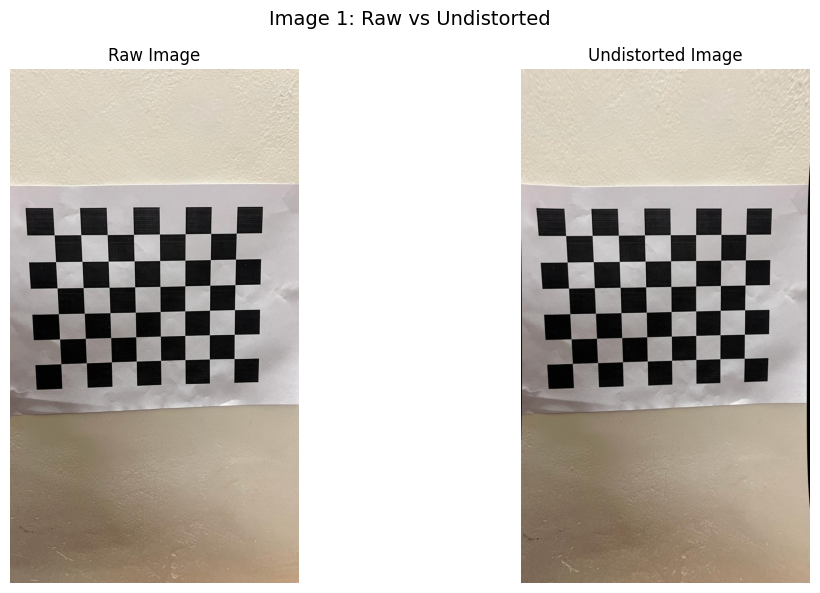

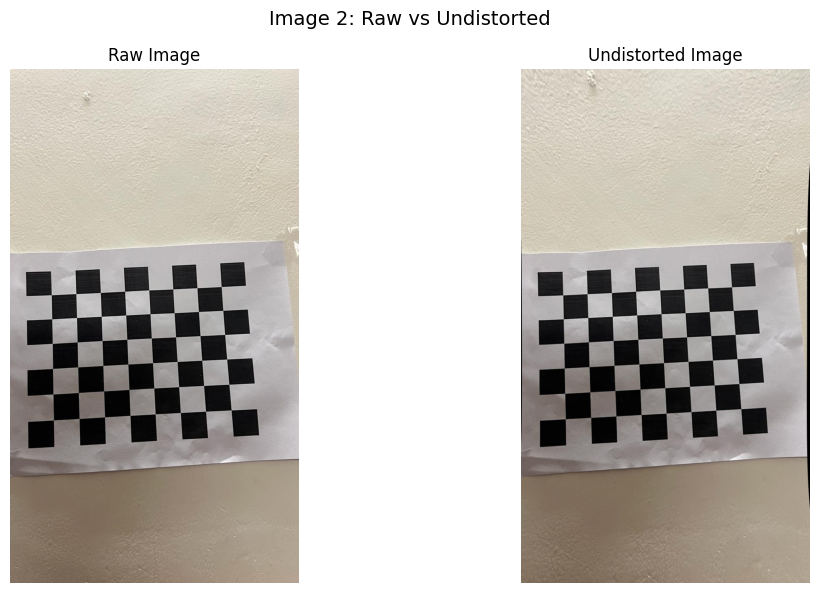

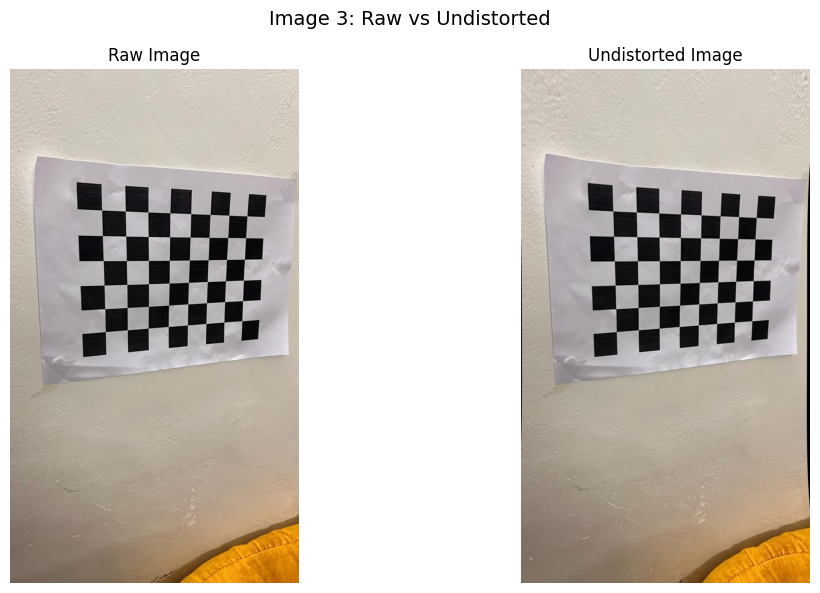

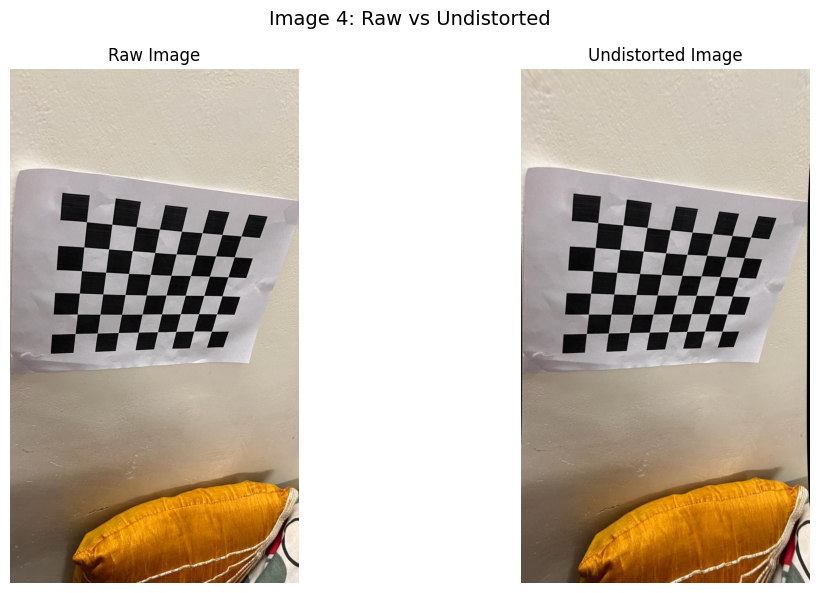

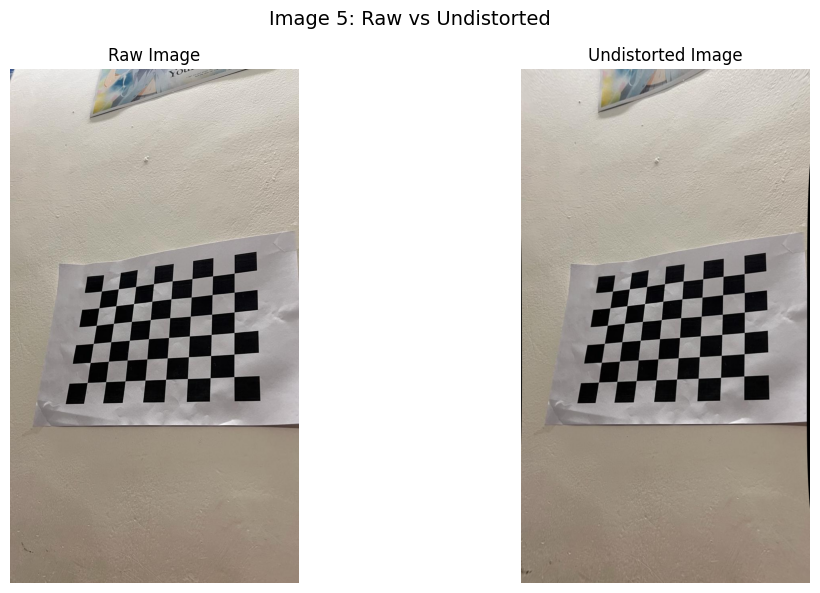

In [4]:
print("Distortion Coefficients:")
print(dist)

# Undistort and display the first 5 images
for i, file_name in enumerate(filenames[:5]):
    full_path = os.path.join(dataset_path, file_name)
    img = cv2.imread(full_path)

    if img is None:
        print(f"Failed to load {file_name} for undistortion")
        continue

    # Undistort the image
    undistorted_img = cv2.undistort(img, mtx, dist, None, mtx)

    # Convert BGR to RGB for plotting
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    undistorted_rgb = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB)

    # Plot side by side
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"Image {i+1}: Raw vs Undistorted", fontsize=14)

    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Raw Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(undistorted_rgb)
    plt.title("Undistorted Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# 3.4 - Re-Projection Error

Image 01 - Reprojection Error: 0.0435 pixels
Image 02 - Reprojection Error: 0.0443 pixels
Image 03 - Reprojection Error: 0.0884 pixels
Image 04 - Reprojection Error: 0.1021 pixels
Image 05 - Reprojection Error: 0.0915 pixels
Image 06 - Reprojection Error: 0.0712 pixels
Image 07 - Reprojection Error: 0.0879 pixels
Image 08 - Reprojection Error: 0.0470 pixels
Image 09 - Reprojection Error: 0.0438 pixels
Image 10 - Reprojection Error: 0.0483 pixels
Image 11 - Reprojection Error: 0.0614 pixels
Image 12 - Reprojection Error: 0.1164 pixels
Image 13 - Reprojection Error: 0.0485 pixels
Image 14 - Reprojection Error: 0.0502 pixels
Image 15 - Reprojection Error: 0.0945 pixels
Image 16 - Reprojection Error: 0.0749 pixels
Image 17 - Reprojection Error: 0.0341 pixels
Image 18 - Reprojection Error: 0.0658 pixels
Image 19 - Reprojection Error: 0.0709 pixels
Image 20 - Reprojection Error: 0.0597 pixels
Image 21 - Reprojection Error: 0.0997 pixels
Image 22 - Reprojection Error: 0.0560 pixels
Image 23 -

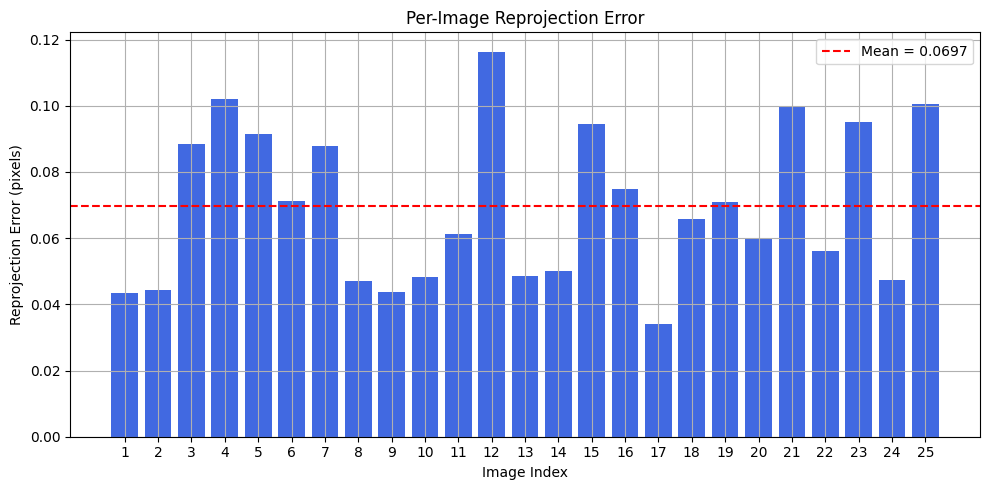

In [5]:
reprojection_errors = []

for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)
    reprojection_errors.append(error)

# individual errors
for i, err in enumerate(reprojection_errors):
    print(f"Image {i+1:02d} - Reprojection Error: {err:.4f} pixels")

# mean and standard deviation
mean_error = np.mean(reprojection_errors)
std_error = np.std(reprojection_errors)
print(f"\nMean Reprojection Error: {mean_error:.4f} pixels")
print(f"Standard Deviation: {std_error:.4f} pixels")

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(reprojection_errors)+1), reprojection_errors, color='royalblue')
plt.axhline(mean_error, color='red', linestyle='--', label=f"Mean = {mean_error:.4f}")
plt.title("Per-Image Reprojection Error")
plt.xlabel("Image Index")
plt.ylabel("Reprojection Error (pixels)")
plt.xticks(range(1, len(reprojection_errors)+1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3.5 - Corners Detected

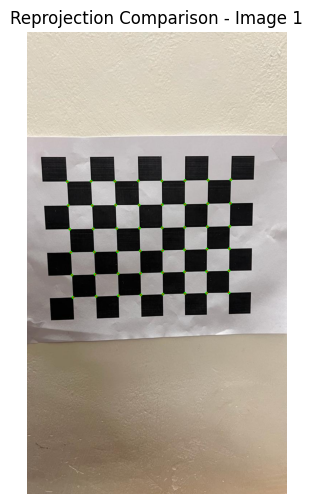

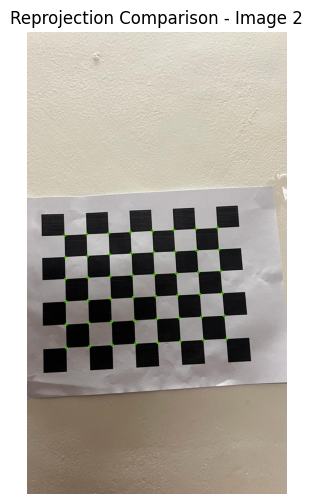

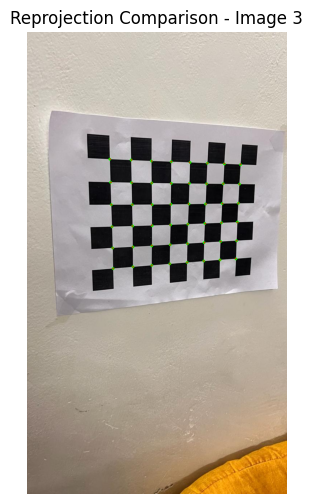

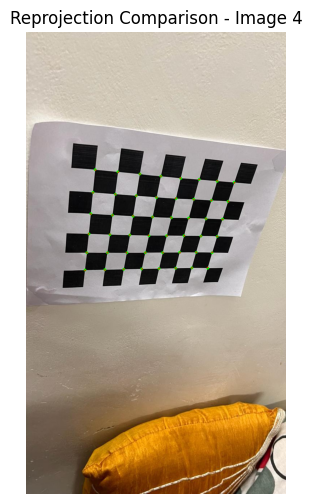

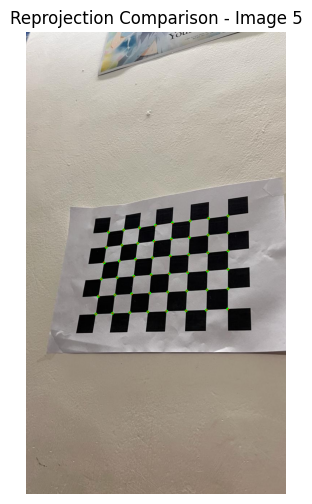

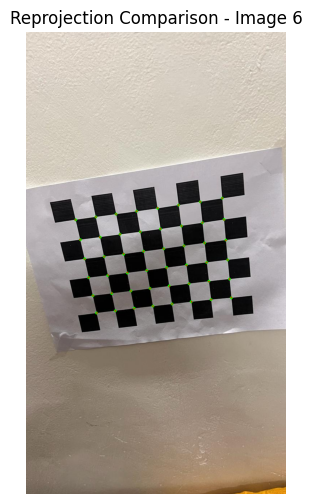

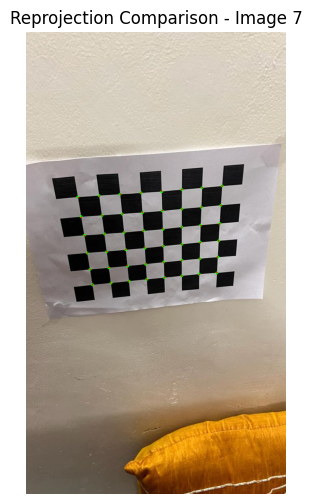

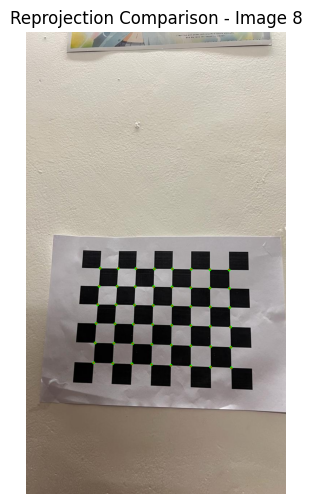

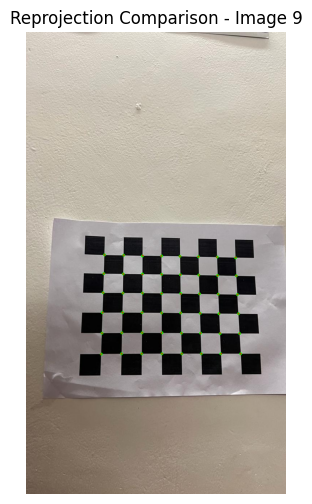

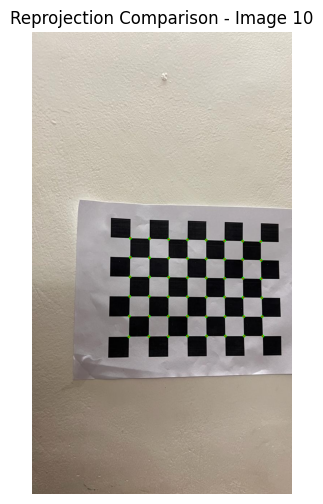

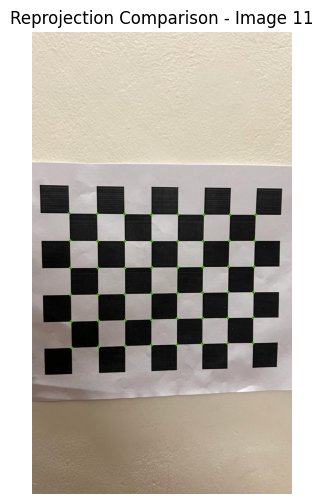

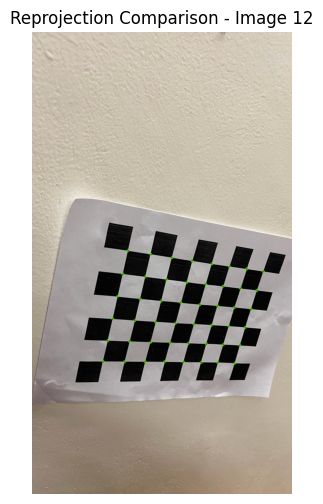

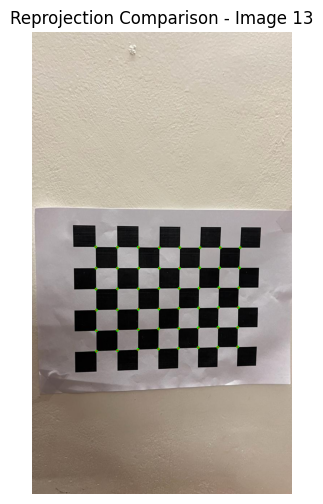

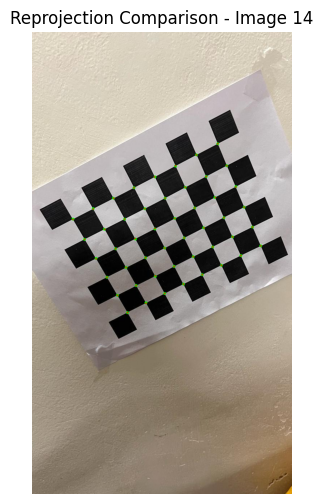

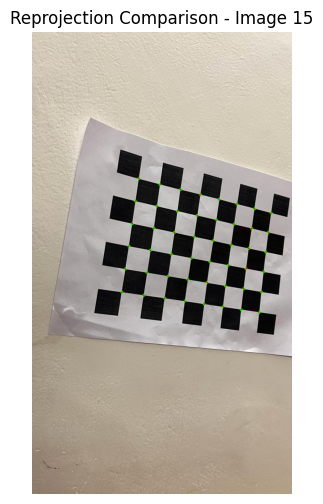

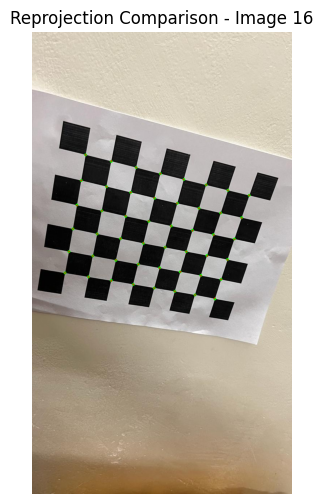

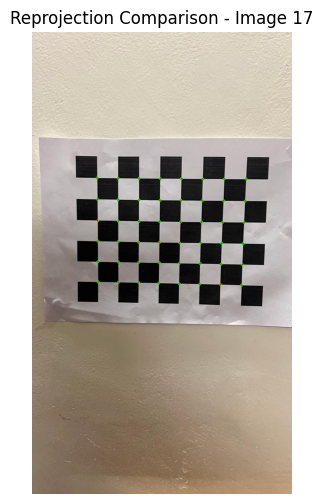

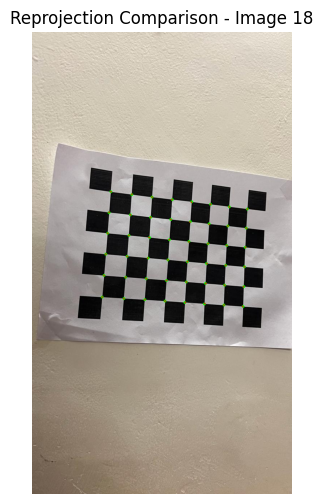

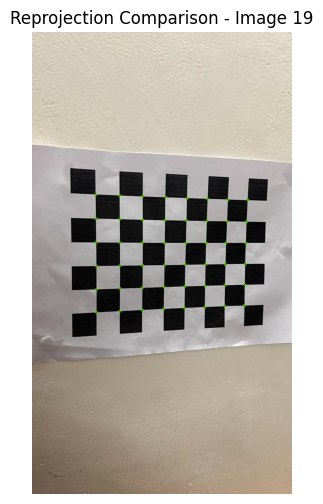

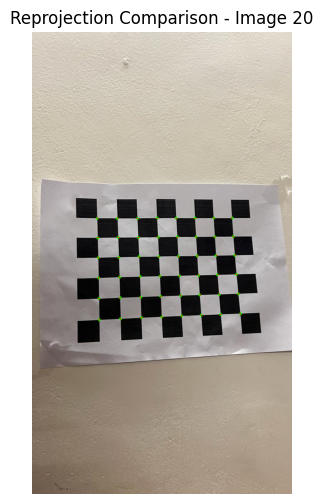

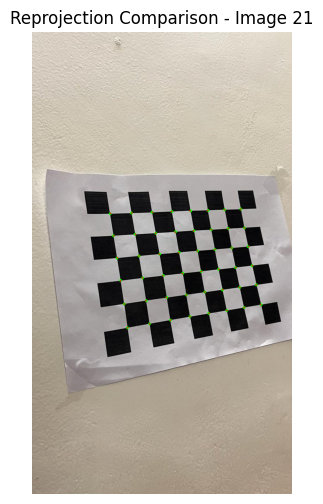

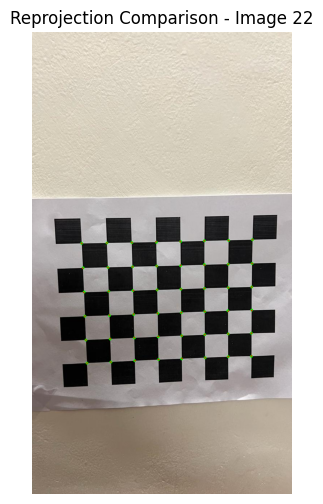

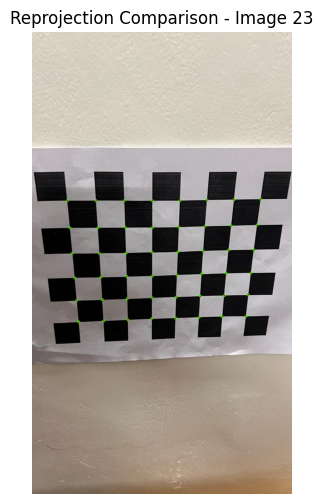

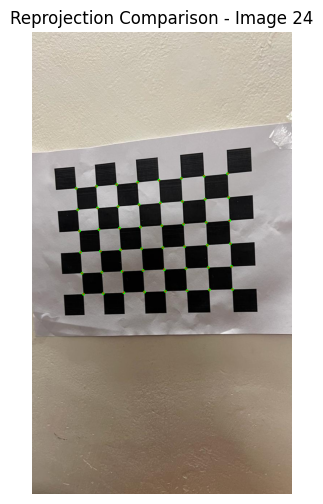

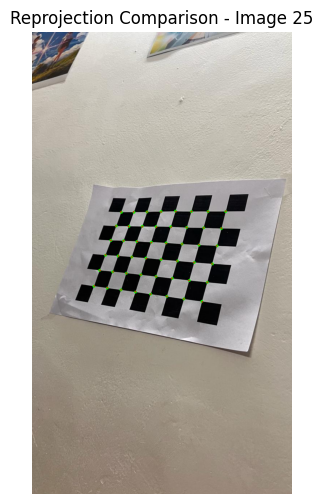

In [6]:
import matplotlib.pyplot as plt

for i, file_name in enumerate(filenames):
    full_path = os.path.join(dataset_path, file_name)
    img = cv2.imread(full_path)

    if img is None:
        print(f"Failed to load {file_name}")
        continue

    # Project object points using estimated parameters
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)

    # Draw original detected corners (green) and reprojected corners (red)
    for p1, p2 in zip(imgpoints[i], imgpoints2):
        pt1 = tuple(np.round(p1.ravel()).astype(int))  # Detected
        pt2 = tuple(np.round(p2.ravel()).astype(int))  # Reprojected
        cv2.circle(img, pt1, 4, (0, 255, 0), -1)  # Green
        cv2.circle(img, pt2, 2, (0, 0, 255), -1)  # Red

    # Convert BGR to RGB for plotting
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Plot using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.title(f"Reprojection Comparison - Image {i+1}")
    plt.axis('off')
    plt.show()

# 3.6 - Checkerboard Plane Normals

In [7]:
plane_normals = []

for i in range(len(rvecs)):
    R, _ = cv2.Rodrigues(rvecs[i])         # Convert to rotation matrix
    normal_ci = R[:, 2]                    # Third column is the Z-axis of the checkerboard in camera frame
    plane_normals.append(normal_ci)
    print(f"Image {i+1:02d} - Plane Normal (Camera Frame): {normal_ci}")

Image 01 - Plane Normal (Camera Frame): [-0.07616832 -0.14870444  0.9859439 ]
Image 02 - Plane Normal (Camera Frame): [-0.02286982  0.12383014  0.99203985]
Image 03 - Plane Normal (Camera Frame): [-0.39826969 -0.18715469  0.89797237]
Image 04 - Plane Normal (Camera Frame): [-0.34643455 -0.5281008   0.77530165]
Image 05 - Plane Normal (Camera Frame): [0.35820574 0.39861418 0.8442721 ]
Image 06 - Plane Normal (Camera Frame): [ 0.04521851 -0.32517343  0.94457267]
Image 07 - Plane Normal (Camera Frame): [-0.127789   -0.50726444  0.85226331]
Image 08 - Plane Normal (Camera Frame): [0.07201333 0.21723429 0.97345947]
Image 09 - Plane Normal (Camera Frame): [-0.09543047  0.19721068  0.97570537]
Image 10 - Plane Normal (Camera Frame): [-0.14608073  0.07386587  0.98651115]
Image 11 - Plane Normal (Camera Frame): [-0.10773352 -0.08642538  0.99041615]
Image 12 - Plane Normal (Camera Frame): [-0.3852682  -0.30920821  0.86945885]
Image 13 - Plane Normal (Camera Frame): [-0.13551126 -0.10599323  0.98